# PyTorch Calculus 

Let us consider a function y = mx + c, the equation of a straight line with slope m and y intercept c. At specific values of x, you get a specific value of y based on m and c. The derivative of this function always returns the slope of the line. Let us define x = 3,m = 4,c = 5 and find the value of y.



In [4]:
import torch 

x = torch.tensor(3.0, requires_grad=True)
m = torch.tensor(4.0, requires_grad=True)
c = torch.tensor(5.0)

y = m*x+c

print(y)

tensor(17., grad_fn=<AddBackward0>)


In [5]:
print("x = ", x)
y = 3 * x ** 2 + 2 * x + 5

print(y)

x =  tensor(3., requires_grad=True)
tensor(38., grad_fn=<AddBackward0>)


# To find the dervative of  with respect to a particular variable, we can call grad function on the variable of choice. Hence, to find , after y.backward(), we can use x.grad

$$y' = 6x +2$$

With x = 3, then y' = 20

In [6]:
y.backward(retain_graph=True)
print(x.grad)

tensor(20.)


## Finding Local Minima and Local Maxima

Now we will use a quardratic equation
$$y = 3x - 6x^3 - x^4 + 4$$

and use PyTorch functions to find it's local minima and maxima

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#set x between -6 and 1, with 10000 intervals
X = torch.tensor(np.linspace(start = -6, stop = 1, num = 10000), requires_grad=True)

print(type(X))

<class 'torch.Tensor'>


In [8]:
X

tensor([-6.0000, -5.9993, -5.9986,  ...,  0.9986,  0.9993,  1.0000],
       dtype=torch.float64, requires_grad=True)

In [9]:
#define equation in python way
y = 3 * X - 6 * X ** 3 - X ** 4 + 4

In [10]:
print(len(y))

10000


In [11]:
#let us run over a for-loop
local_min_max = []
for i in range(len(y)):
    y[i].backward(retain_graph=True)

In [12]:
threshold = 0.03

# Indices where gradient is 0   
zeros = np.where(torch.abs(X.grad) <= threshold)
print(zeros) #we got index of 3 local minima / maxima

(array([2196, 7955, 7956, 7957, 7958, 7959, 7960, 9128, 9129, 9130, 9131,
       9132], dtype=int64),)


In [13]:
def calculateFunc(x):
    
    y = 3 * x - 6 * x ** 3 - x ** 4 + 4
    #print("x = ", x, "y = ", y)
    return y

In [14]:
#plotting
x = np.linspace(start = -6, stop = 1, num = 10000)
print(len(x))

10000


In [15]:
y_list = [] #declare a bucket to collect y 
for each in x:
    val = calculateFunc(each)
    #print(val)
    y_list.append(val)

In [16]:
#show first 10 value in y_list
y_list[:10]

[-14.0,
 -13.846737592877162,
 -13.693581009873014,
 -13.540530213942247,
 -13.387585168043643,
 -13.234745835142576,
 -13.082012178209425,
 -12.929384160220934,
 -12.776861744159532,
 -12.62444489301356]

In [90]:
zeros[0]

array([2196, 7955, 7956, 7957, 7958, 7959, 7960, 9128, 9129, 9130, 9131,
       9132])

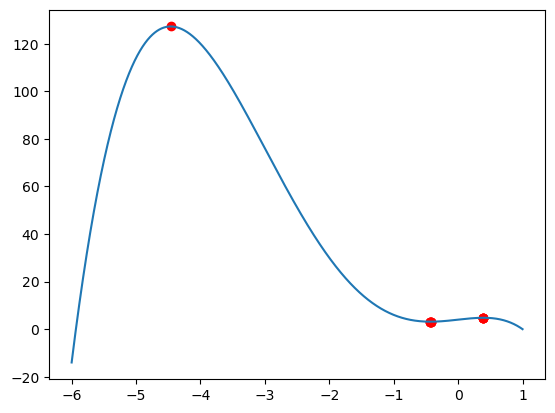

In [91]:
plt.plot(x, y_list, ls='-')    
for i in range(len(zeros[0])):
    plt.scatter(X[zeros[0][i]].detach().numpy(), calculateFunc(X[zeros[0][i]].detach().numpy()), color="Red")
plt.show()

# Question: how to determine the maxima only?